In [1]:
import statsmodels.api as sm
import pandas as pd

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)

In [2]:
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [14]:
df["am"] = df["am"].astype(str)
df["vs"] = df["vs"].astype(str)
df["cyl"] = df["cyl"].astype(str)
# Convert the other variables below

In [15]:
!pip install plotnine

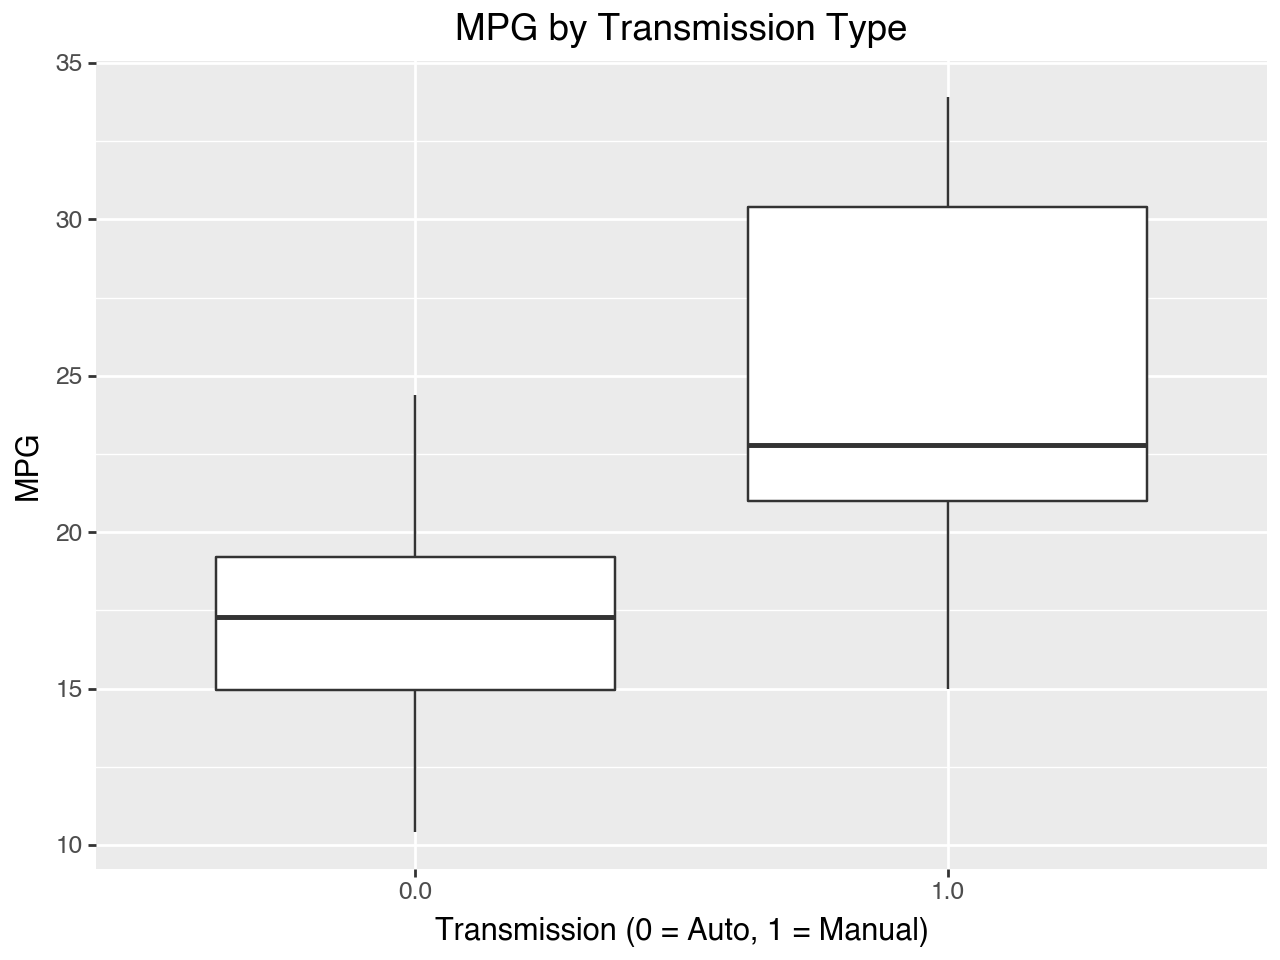

In [16]:
from plotnine import ggplot, aes, geom_boxplot, geom_histogram, facet_wrap, ggtitle, xlab, ylab
import pandas as pd

(
    ggplot(df, aes(x='am', y='mpg')) +
    geom_boxplot() +
    ggtitle("MPG by Transmission Type") + 
    xlab("Transmission (0 = Auto, 1 = Manual)") +  # For the x-axis label
    ylab("MPG")  # For the y-axis label
)

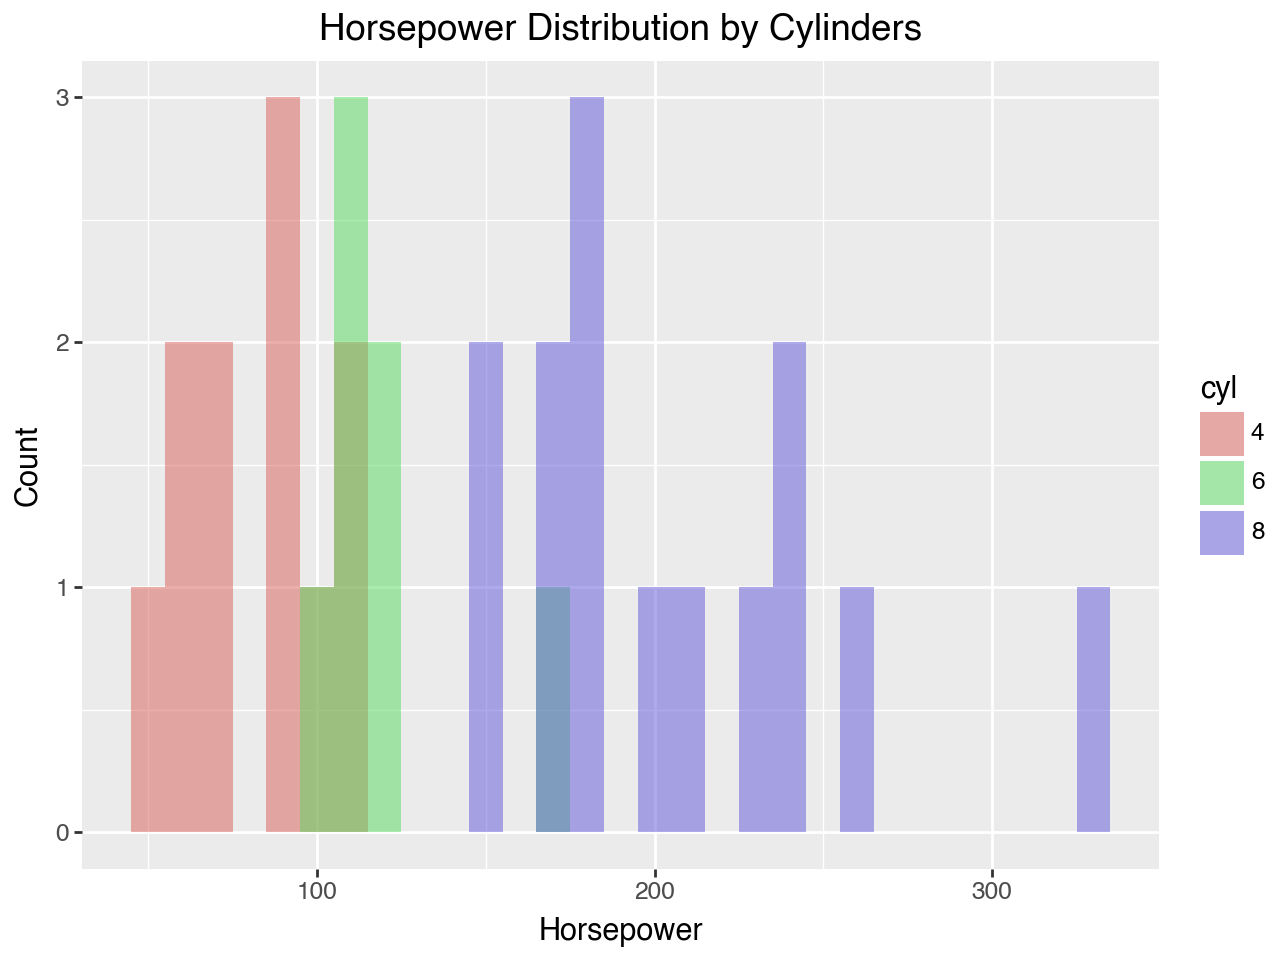

In [17]:
from plotnine import ggplot, aes, geom_histogram, ggtitle, xlab, ylab
import pandas as pd

(
    ggplot(df, aes(x='hp', fill='cyl')) +  
    geom_histogram(binwidth=10, position="identity", alpha=0.5) +  
    ggtitle("Horsepower Distribution by Cylinders") +  
    xlab("Horsepower") +  # X-axis label
    ylab("Count")  # Y-axis label
)

In [18]:
df["am"] = df["am"].astype(float)
df["cyl"] = df["cyl"].astype(float)


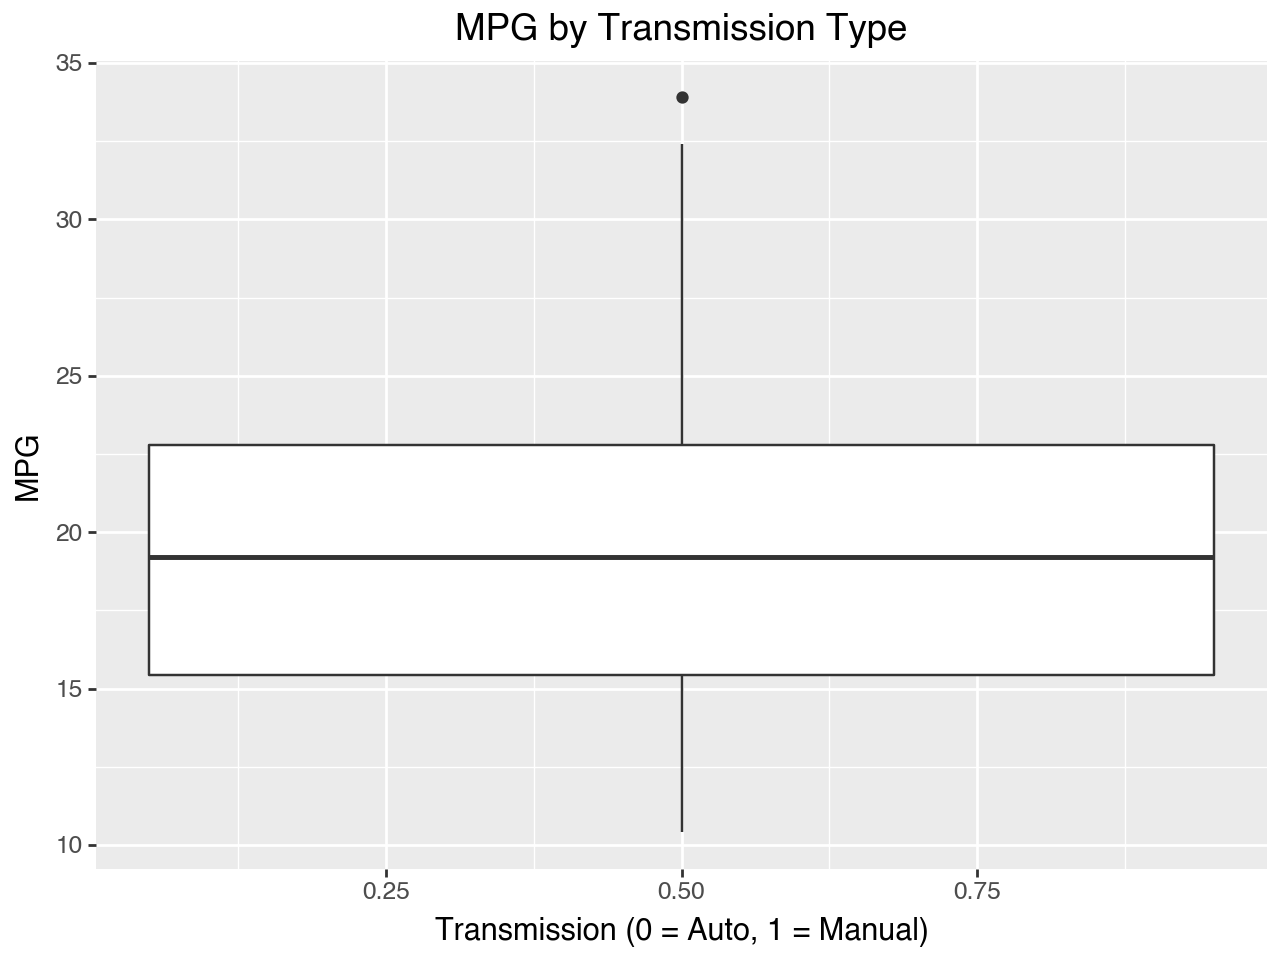

In [19]:
(
    ggplot(df, aes(x='am', y='mpg')) +
    geom_boxplot() +
    ggtitle("MPG by Transmission Type") + 
    xlab("Transmission (0 = Auto, 1 = Manual)") +  
    ylab("MPG") 
)

Only one boxplot instead of 2 because the am value is interpreted as a numerical value rather than category

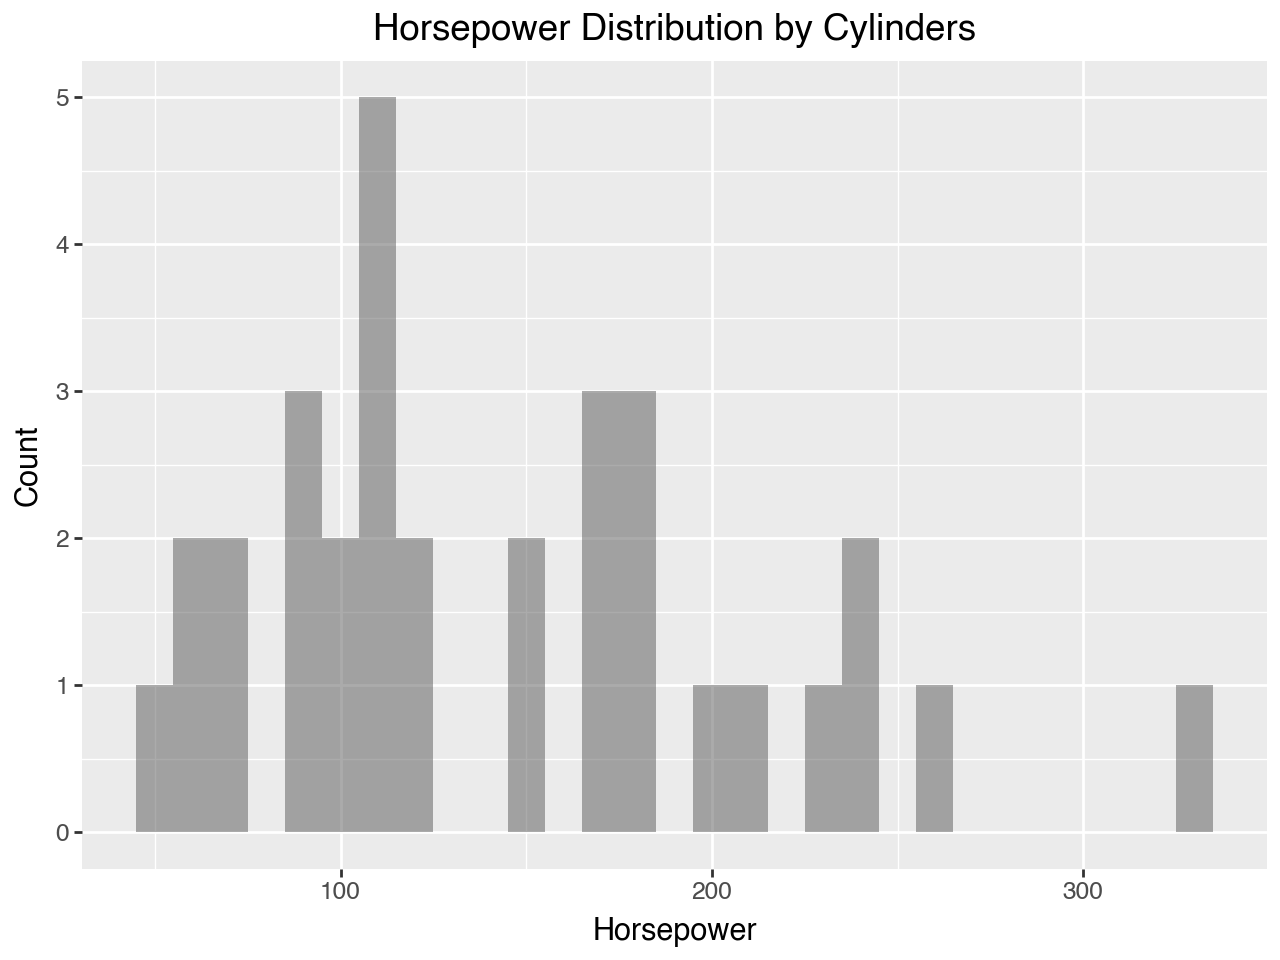

In [21]:
(
    ggplot(df, aes(x='hp', fill='cyl')) +  
    geom_histogram(binwidth=10, position="identity", alpha=0.5) +  
    ggtitle("Horsepower Distribution by Cylinders") +  
    xlab("Horsepower") +  
    ylab("Count")  
)

when cyl is a float it is plotted with the same color so it not possible to tell the differences between them.

In [22]:
df["am"] = df["am"].astype(str)
df["cyl"] = df["cyl"].astype(str)

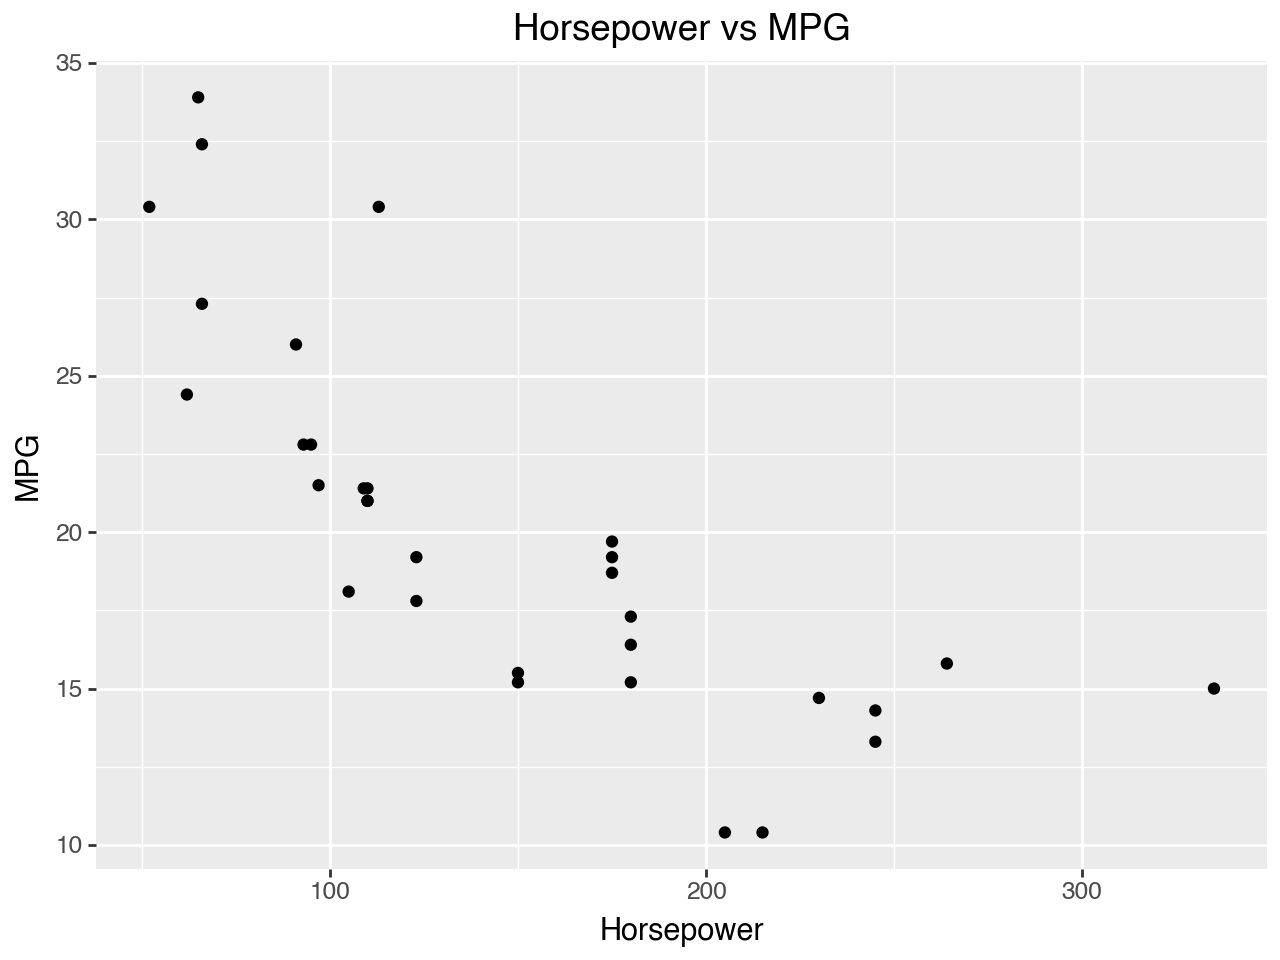

In [24]:
from plotnine import geom_point

(
    ggplot(df, aes(x='hp', y='mpg')) +  
    geom_point() +  
    ggtitle("Horsepower vs MPG") +  
    xlab("Horsepower") +  
    ylab("MPG")  # Label for the y-axis
)

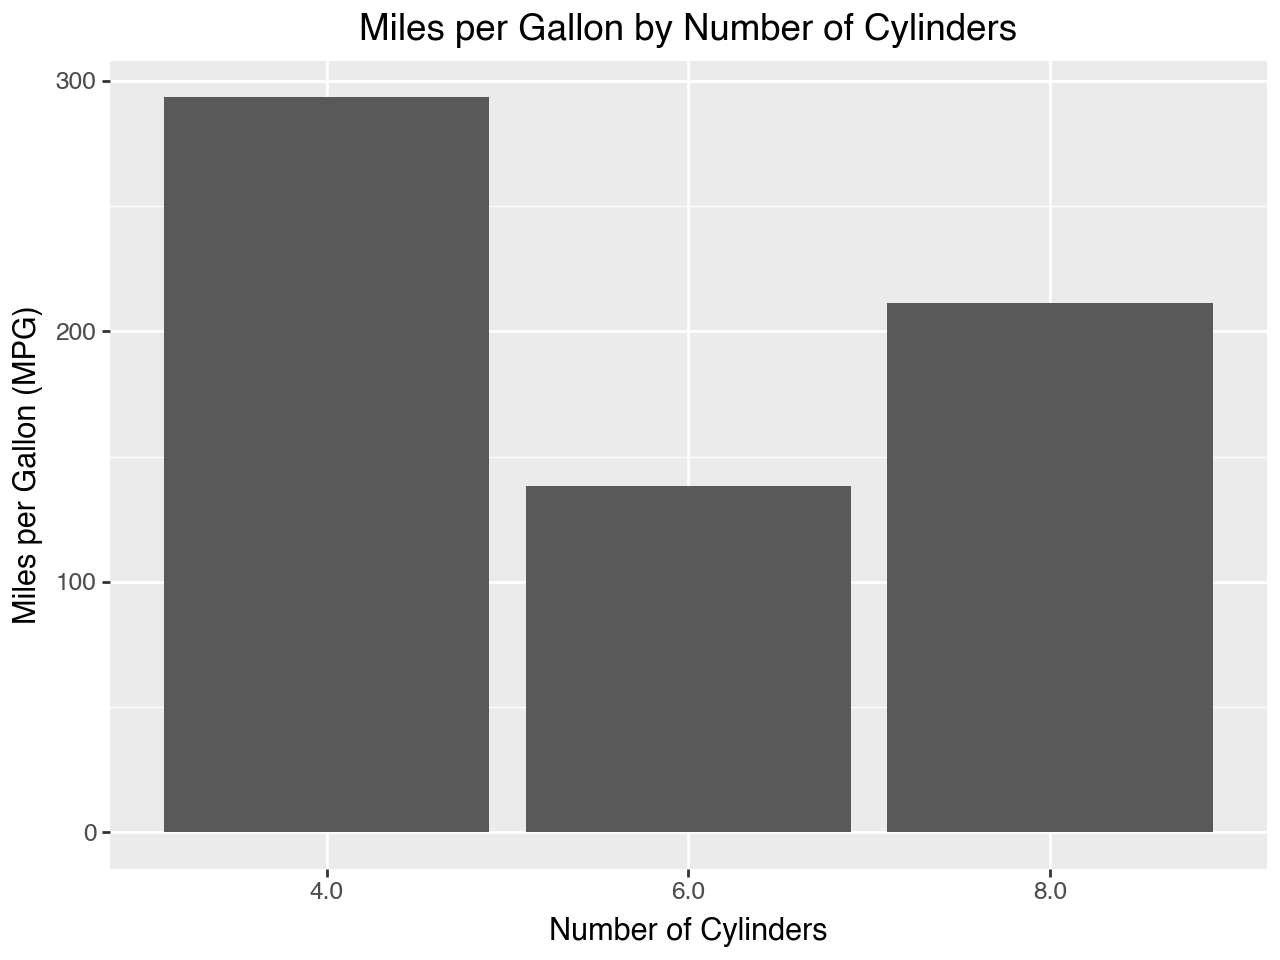

In [26]:
from plotnine import geom_bar
(
    ggplot(df, aes(x='cyl', y='mpg')) +  
    geom_bar(stat='identity') +  
    ggtitle("Miles per Gallon by Number of Cylinders") + 
    xlab("Number of Cylinders") +  # X-axis label
    ylab("Miles per Gallon (MPG)")  # Y-axis label
)

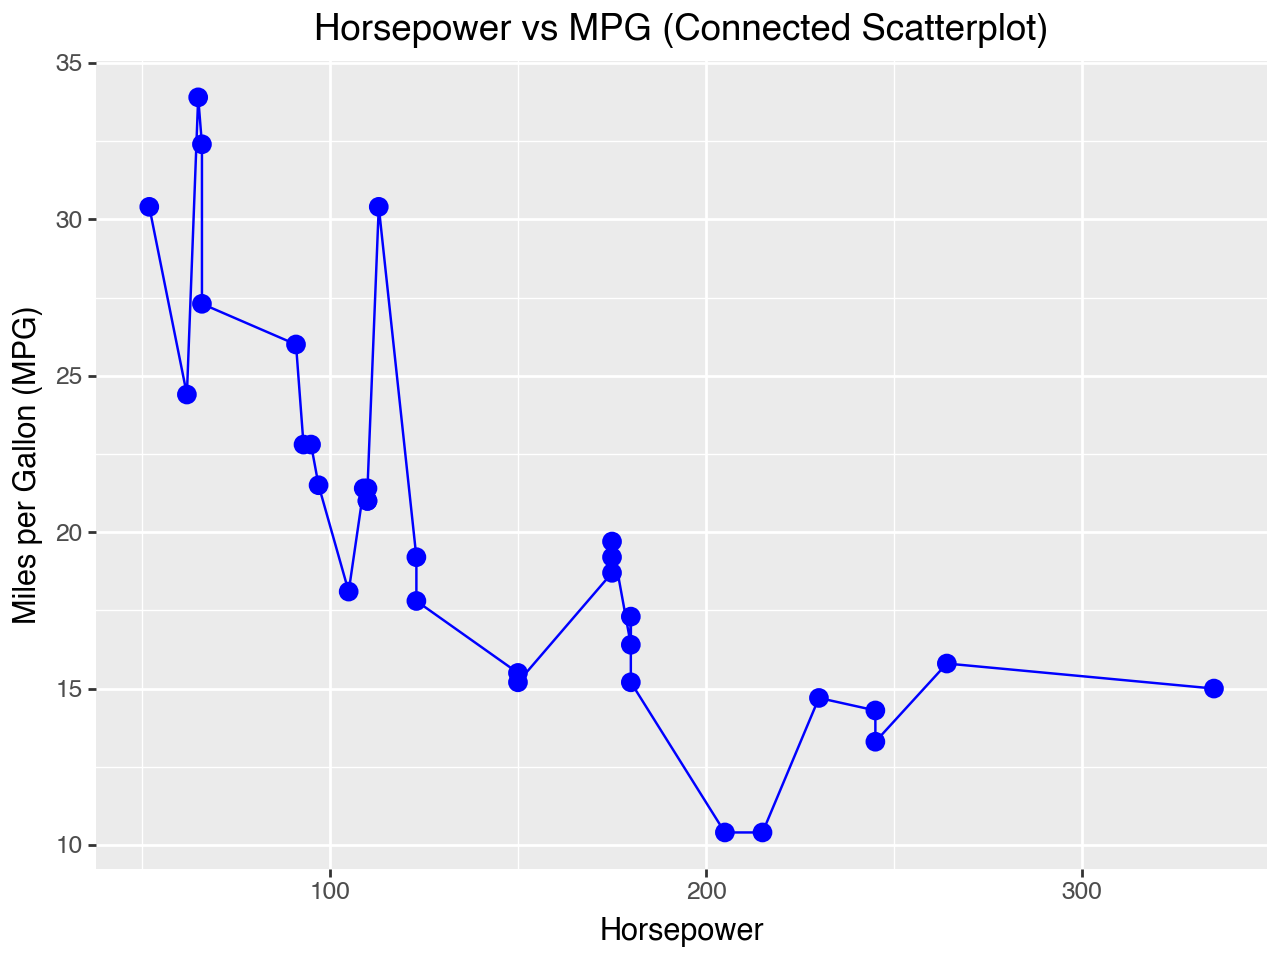

In [30]:
from plotnine import geom_line
(
    ggplot(df, aes(x='hp', y='mpg')) +  
    geom_point(size=3, color='blue') +  
    geom_line(color='blue') +  
    ggtitle("Horsepower vs MPG (Connected Scatterplot)") +  
    xlab("Horsepower") +  # X-axis label
    ylab("Miles per Gallon (MPG)")  # Y-axis label
)